# Imports
Run this code to import necessary modules. Note that the functions ``cost_function`` and ``gradient`` imported from module ``gd`` are stubs. You will need to fill in the code in ``gd.py``.

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from gd import cost_function, gradient  # stubs

# Create a simple data set

Run this cell to generate and plot some data from the linear model $y \approx -1 + 2x$, that is, $w_0 = -1$, which is the intercept, and $w_1 = 2$, which is the slope.

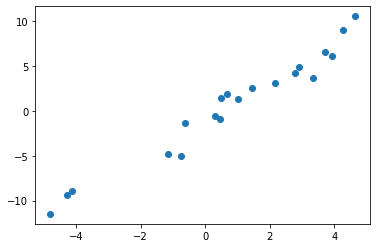

In [3]:
# Set the random seed so the program will always generate the same data
np.random.seed(0)

# Generate n random x values between -5 and 5
n = 20
x = 10 * np.random.rand(n) - 5

# Generate y values from the model y ~= 2x - 1
epsilon = np.random.randn(n) # episilon is a small perturbation/noise introduced in the data
y = -1 + 2*x + epsilon

plt.plot(x, y, marker='o', linestyle='none')
plt.show()

# TODO: implement the cost function (8 points)
The squared error cost function (i.e., the objective/loss function) is
$$\ell(\boldsymbol{\rm w}) = \frac{1}{2}\sum_{i=1}^n \big(f(x^{(i)};\boldsymbol{\rm w}) - y^{(i)}\big)^2.$$
Note, here we are multiplying 1/2 to the loss function that we introduced in class to easy the calculation. Since, 1/2 is just a constant, the optimal solution to the minization problem with this revised objective function is identical to the old one. In our problem here, $\boldsymbol{\rm w}$ is a vector of size 2, i.e., $\boldsymbol{\rm w} = [w_0\mbox{ }w_1]^T$, where $w_0$ is the intercept and $w_1$ is the slop. Open the file ``gd.py`` and implement ``cost_function``. Then run this cell to test it out.

In [4]:
print(cost_function(x, y, 0,  1))   # should print 104.772951994
print(cost_function(x, y, 2, -1))   # should print 744.953822077
print(cost_function(x, y, -1, 2))   # should print 14.090816198

104.77295199433607
744.9538220768487
14.090816198013721


In [5]:
# Construct a dense grid of (theta_0, theta_1) values
w0_vals = np.linspace(-10, 10)
w1_vals = np.linspace(-10, 10)
[W0, W1] = np.meshgrid(w0_vals, w1_vals)

# Define a cost function that has x and y "baked in"
def mycost(w0, w1):
    return cost_function(x, y, w0, w1)

# Now vectorize this cost function and apply it simultaneously to all
# pairs in dense grid of (theta_0, theta_1) values
mycost_vectorized = np.vectorize(mycost)
J_SURF = mycost_vectorized(W0, W1)

# Define the test inputs
x_test = np.linspace(-5, 5, 100)

fig = plt.figure(1, figsize=(10,4))

# Create the figure
def init_plot():
    fig.clf();

    # Build left subplot (cost function)
    ax1 = fig.add_subplot(1, 2, 1); 
    ax1.contour(W0, W1, J_SURF, 20)
    ax1.set_xlabel('Intercept w0')
    ax1.set_ylabel('Slope w1')
    ax1.set_xlim([-10, 10])
    ax1.set_ylim([-10, 10])

    # The data will be added later for these plot elements:
    line, = ax1.plot([], []);
    dot,  = ax1.plot([], [], marker='o');

    # Build right subplot (data + current hypothesis)
    ax2 = fig.add_subplot(1, 2, 2);
    ax2.plot(x, y, marker='o', linestyle='none') 
    ax2.set_xlim([-6, 6])
    ax2.set_ylim([-10, 10])

    # The data will be added later for this:
    hyp, = ax2.plot( x_test, 0*x_test )
    
    return line, dot, hyp


# Define a function to update the plot
def update_plot(w0, w1, line, dot, hyp):
    line.set_xdata( np.append(line.get_xdata(), w0 ) )
    line.set_ydata( np.append(line.get_ydata(), w1 ) )
    dot.set_xdata([w0])
    dot.set_ydata([w1])
    hyp.set_ydata( w0 + w1 * x_test )

<Figure size 720x288 with 0 Axes>

# TODO: implement gradient descent (18 points)

In this cell you will implement gradient descent. Follow these steps:

1. Calculate the gradient of our loss function with respect to both $w_0$ and $w_1$, i.e., $\frac{\partial}{\partial w_0} \ell(\boldsymbol{\rm w})$ and $\frac{\partial}{\partial w_1} \ell(\boldsymbol{\rm w})$.
1. Implement the function ``gradient`` in ``gd.py`` to return these two partial derivatives. (**8 points**)
1. Complete the code below for gradient descent (**10 points**)
    * Select a step size
    * Run for a fixed number of iterations (say, 20 or 200)
    * Update w0 and w1 using the partial derivatives
    * Record the value of the cost function attained in each iteration of gradient descent so you can examine its progress.

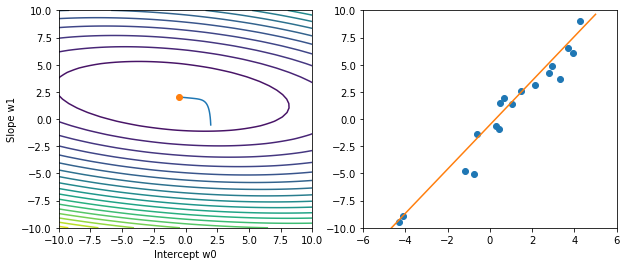

In [9]:
line, dot, hyp = init_plot()

iters = 200  # change as needed

# TODO: intialize w0, w1, and step size
w0 = 2
w1 = -1
alpha = 0.001 #Step size
iteration = 100
for i in range(0, iteration):
    
    # Uncomment the code below to display progress of the algorithm so far
    # as it runs. 
    #
    # clear_output(wait=True)
    # update_plot(w0, w1, line, dot, hyp)
    # display(fig)
    
    # TODO: write code to get partial derivatives (hint: call gradient in gd.py) 
    # and update w0 and w1
    d_w0,d_w1 = gradient(x, y, w0, w1)
    w0 = w0 - alpha * d_w0
    w1 = w1 - alpha * d_w1
    
    clear_output(wait=True)
    update_plot(w0, w1, line, dot, hyp)
    display(fig)
    
    pass

# TODO: assess convergence (6 points)
Plot the cost function vs. iteration. Did the algorithm converge? (Converging means it found the actual setting of $\boldsymbol{\rm w}$ that minimizes the cost. If the cost went up or did not go down as far as it could, it did not converge.)

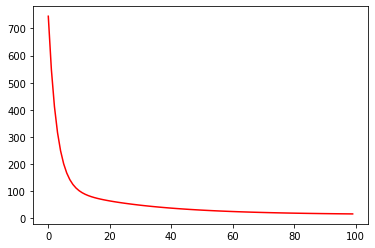

In [10]:
# TODO: write code
cost_list = []
w0 = 2
w1 = -1
for i in range(0, iteration):
    cost = cost_function(x, y, w0, w1)
    cost_list.append(cost)
    # TODO: write code to get partial derivatives (hint: call gradient in gd.py) 
    # and update w0 and w1
    d_w0,d_w1 = gradient(x, y, w0, w1)
    w0 = w0 - alpha * d_w0
    w1 = w1 - alpha * d_w1
    
    
    pass

plt.plot(list(range(0,iteration)), cost_list, '-r')

# TODO: experiment with step size (8 points)

After you have completed the implementation, do some experiments with different numbers of iterations and step sizes to assess convergence of the algorithm. Report the following:
* A step size for which the algorithm converges to the minimum in at most 200 iterations
* A step size for which the algorithm converges, but it takes more than 200 iterations
* A step size for which the algorithm does not converge, no matter how many iterations are run

** *Write your answer here*. **
1. With step size of 0.001, the algorithm converges to the minumum within less than 200 iterations.
2. With step size of 0.0001, the algorithm takes more than 200(around 500) iterations to converge.
3. If step size(eg: 0.02) is much higher, the the algorithm may not hit the convergence and pass it through. On the case no matter how many iterations are run, it will not work.
